# Introduction

Lasso and Ridge regression are linear regression in which regularization is performed. By regularization, overfitting can be prevented.

A normal linear model is as follows.

$ y = \Sigma_{i=1}^{n} w_i x_i + w_0$

It has n weights and n-1 number of features excluding the bias term ($w_0$). If there is only one feature, $w_1$ represents slope and $w_0$ represents intercept. The goal of linear regression is to optimize weights so that the cost function is minimized. The cost function shows how far the model is from the actual data. It can be written as follows.

$ L = \Sigma_{j=1}^{m} (\hat{y}^j - y^j)^2 = \Sigma_{j=1}^{m} (\Sigma_{i=0}^n w_i x_i^j - y^j)^2$ 

In the expression above, I have assumed $x_0$ is 1.

If the model is too complicated (e.g. too many features), it causes overfitting. The model tries to follow the  data points too much and "rambles," giving new data points in between inaccurate predictions. 

One of the techniques to prevent this is regularization. This means putting a new term in the cost function to penalize too large weights in the model. The combination of regularization and linear regression is called Lasso and Ridge regression.

**Lasso Regression**

In Lasso Regression, the penalty term is L1 norm of the weights i.e. the sum of the absolute values of the weights.

$ L = \Sigma_{j=1}^{m} (\hat{y}^j - y^j)^2 = \Sigma_{j=1}^{m} (\Sigma_{i=0}^n w_i x_i^j - y^j)^2 + \lambda \Sigma |w_i|$

Lasso stands for Least Absolute Shrinkage and Selection Operator.

**Ridge Regression**

In Ridge Regression, the penalty term is L2 norm of the weights i.e. the sum of the square of the weights.

$ L = \Sigma_{j=1}^{m} (\hat{y}^j - y^j)^2 = \Sigma_{j=1}^{m} (\Sigma_{i=0}^n w_i x_i^j - y^j)^2 + \lambda \Sigma (w_i)^2$

In both of them, if weights take large values the cost function will be penalized. Regularization shrinks weights and decreases model complexity and overfitting. $\lambda$ decides how strong the regularization is. If it's 0, it will be a normal linear regression since the penalty term disappears. If is quite large, the term gets dominant and all the weights will approach 0.

What's interesting in Lasso regression is some features can lead to zero. So Lasso regression is not only good for suppressing overfitting but for feature selection. It's easier to interpret the model if the number of features is less. 

But how do some features get zero in Lasso and not in Ridge? In this article, let me show you an intuitive and visual explanation for that.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We assume the model has only two features for simplicity.

$y = w_1 x_1 + w_2 x_2 + b$

Where $w_1=4$, $w_2=2$ and $b=0$. Data points were generated according to this model.

In [3]:
X = 4 * np.random.rand(100, 2) - 2
y = np.dot(X, np.array([4,2]).T)

Let's check the shape of the contour plot of each term in the cost function.

First, the cost function of the original linear regression.

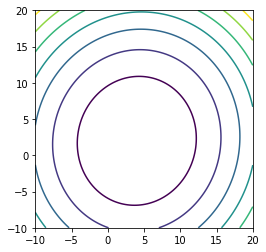

In [4]:
def cost_function(w1, w2):
    return sum((np.dot(X, np.array([w1,w2]).T) - y)**2)

w1 = np.linspace(-10,20,100)
w2 = np.linspace(-10,20,100)
W1, W2 = np.meshgrid(w1,w2)
Z = np.vectorize(cost_function)(W1, W2)

plt.contour(W1, W2, Z)
plt.gca().set_aspect('equal') # make the graph square

It's ellipses with its center at (4,2).

Second, Lasso.

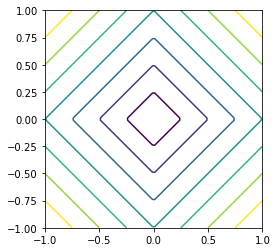

In [5]:
w1 = np.linspace(-1,1,100)
w2 = np.linspace(-1,1,100)
W1, W2 = np.meshgrid(w1,w2)
Z = np.abs(W1) + np.abs(W2)

plt.contour(W1, W2, Z)
plt.gca().set_aspect('equal') # make the graph square

The shape is diamonds.

Lastly, Ridge.

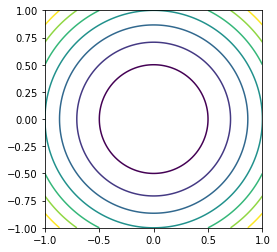

In [6]:
w1 = np.linspace(-1,1,100)
w2 = np.linspace(-1,1,100)
W1, W2 = np.meshgrid(w1,w2)
Z = W1**2 + W2**2

plt.contour(W1, W2, Z)
plt.gca().set_aspect('equal') # make the graph square

It's a circle with its center at (0, 0).

So what do the cost functions of Lasso and Ridge regression look like? Let's plot!

First, Lasso.

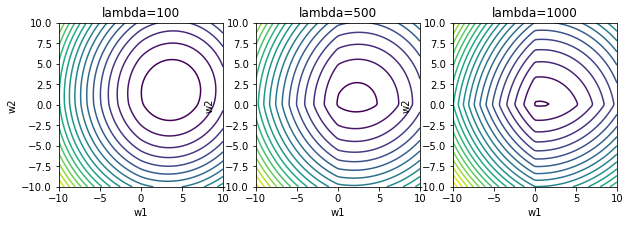

In [7]:
def Lasso_cost_function(w1, w2, lamb):
    return sum((np.dot(X, np.array([w1,w2]).T) - y)**2) + lamb * (np.abs(w1) + np.abs(w2))

def Lasso_contour(lamb):
    w1 = np.linspace(-10,10,100)
    w2 = np.linspace(-10,10,100)
    W1, W2 = np.meshgrid(w1,w2)
    Z = np.vectorize(Lasso_cost_function)(W1,W2,lamb)
    
    plt.contour(W1, W2, Z, 20)
    plt.gca().set_aspect('equal') # make the graph square
    plt.xlabel('w1')
    plt.ylabel('w2')
    
plt.figure(figsize=(10,5))
    
plt.subplot(1,3,1)
Lasso_contour(100)
plt.title('lambda=100')

plt.subplot(1,3,2)
Lasso_contour(500)
plt.title('lambda=500')

plt.subplot(1,3,3)
Lasso_contour(1000)
plt.title('lambda=1000')

The center of the contour is moving toward (0,0) as lambda increases. Also, the contour is getting "edgy" due to the diamond shape of the Lasso penalty term.

Second, Ridge.

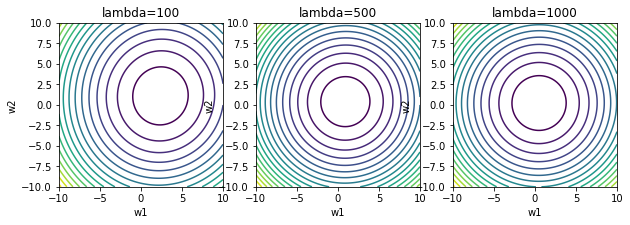

In [8]:
def Ridge_cost_function(w1, w2, lamb):
    return sum((np.dot(X, np.array([w1,w2]).T) - y)**2) + lamb * (w1**2 + w2**2)

def Ridge_contour(lamb):
    w1 = np.linspace(-10,10,100)
    w2 = np.linspace(-10,10,100)
    W1, W2 = np.meshgrid(w1,w2)
    Z = np.vectorize(Ridge_cost_function)(W1,W2,lamb)
    
    plt.contour(W1, W2, Z, 20)
    plt.gca().set_aspect('equal') # make the graph square
    plt.xlabel('w1')
    plt.ylabel('w2')
    
plt.figure(figsize=(10,5))
    
plt.subplot(1,3,1)
Ridge_contour(100)
plt.title('lambda=100')

plt.subplot(1,3,2)
Ridge_contour(500)
plt.title('lambda=500')

plt.subplot(1,3,3)
Ridge_contour(1000)
plt.title('lambda=1000')

The center of the contour is moving toward (0,0) as lambda increases.

To visualize it more, let's plot them in 3D. First, Lasso.

**penalty term of Lasso**

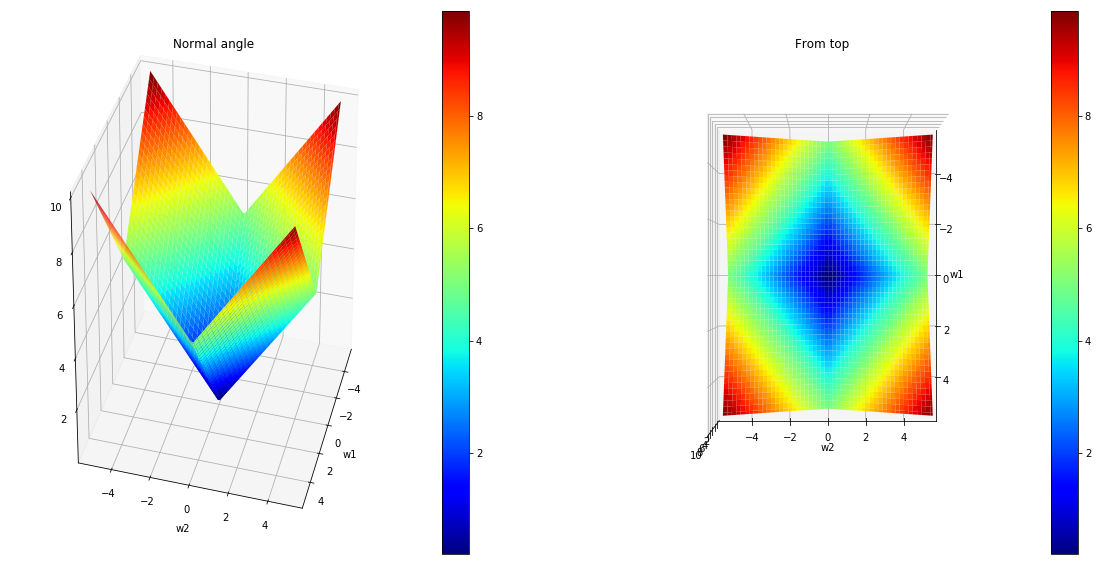

In [34]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

def Lasso_penalty_term(w1, w2):
    return np.abs(w1) + np.abs(w2)

w1 = np.linspace(-5,5,100)
w2 = np.linspace(-5,5,100)
W1, W2 = np.meshgrid(w1,w2)
Z = np.vectorize(Lasso_penalty_term)(W1,W2)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax1.set_title('Normal angle')
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')
ax1.view_init(30,15)
fig.show()

ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax2.set_title('From top')
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax2.view_init(90, 0)
fig.show()

The two plots are the same plot from different angles. The penalty term of Lasso has a pyramid-like shape with notches along each axis. 

**cost function of Lasso**

e:\anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


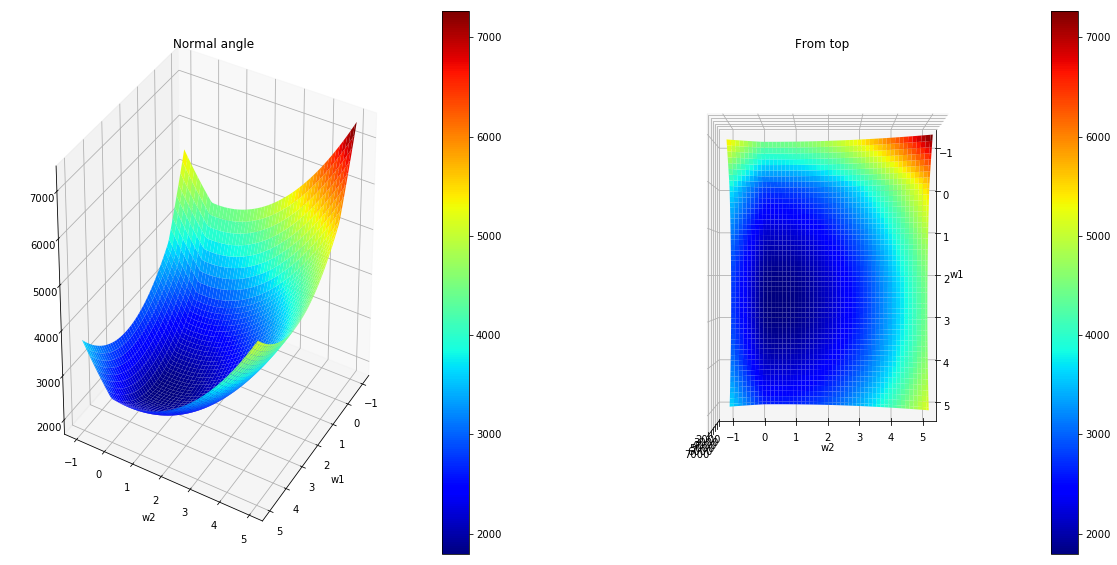

In [9]:
lamb = 400
w1 = np.linspace(-1,5,100)
w2 = np.linspace(-1,5,100)
W1, W2 = np.meshgrid(w1,w2)
Z = np.vectorize(Lasso_cost_function)(W1,W2,lamb)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax1.set_title('Normal angle')
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')
ax1.view_init(30,30)
fig.show()

ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax2.set_title('From top')
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax2.view_init(90, 0)
fig.show()

The two plots are the same plot from different angles. There's a notch along w2 = 0 due to the pyramid shaped penalty term of Lasso. The minimum of the cost function seems like somewhere along the notch. One explanation for why some features can lead to zero in Lasso is, as lambda increases, the effect of the penalty term gets stronger so the minimum point of the cost function is "pulled" into the notches of the pyramid-shaped penalty term of Lasso.

Let's see how the minimum point of the cost function moves as lambda changes.

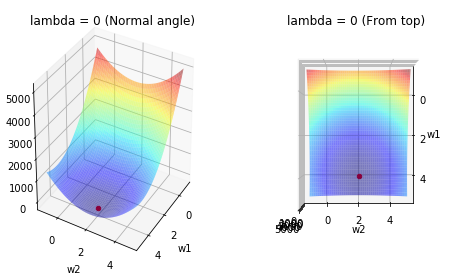

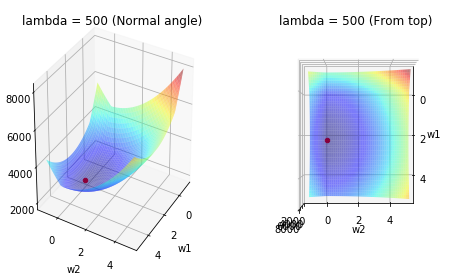

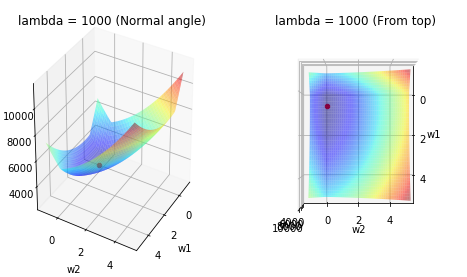

In [10]:
w1 = np.linspace(-1,5,100)
w2 = np.linspace(-1,5,100)
W1, W2 = np.meshgrid(w1,w2)

def find_min(W1,W2,Z):
    ij = np.where(Z == np.amin(Z))
    i,j = ij[0][0], ij[1][0]
    return W1[i][j], W2[i][j], Z[i][j]

def Lasso_3D_lambda(lamb, index):
    Z = np.vectorize(Lasso_cost_function)(W1,W2,lamb)
    w1_min, w2_min, z_min = find_min(W1,W2,Z)
    
    fig = plt.figure(figsize=(8,16))

    ax1 = fig.add_subplot(3,2,index, projection='3d')
    ax1.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0, alpha=0.5)
    ax1.scatter3D(w1_min, w2_min, z_min, color='r')
    ax1.set_title(f'lambda = {lamb} (Normal angle)')
    ax1.set_xlabel('w1')
    ax1.set_ylabel('w2')
    ax1.view_init(30, 30)
    fig.show()

    ax2 = fig.add_subplot(3,2,index+1, projection='3d')
    ax2.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0, alpha=0.5)
    ax2.scatter3D(w1_min, w2_min, z_min, color='r')
    ax2.set_title(f'lambda = {lamb} (From top)')
    ax2.set_xlabel('w1')
    ax2.set_ylabel('w2')
    ax2.view_init(90, 0)
    fig.show()
    
for lamb,i in zip([0, 500, 1000], [1,3,5]):
    Lasso_3D_lambda(lamb, i)

The minimum point shown as a red dot is moving from (4, 2) to w2 axis then to (0,0).

Next, Ridge.

**penalty term of Ridge**

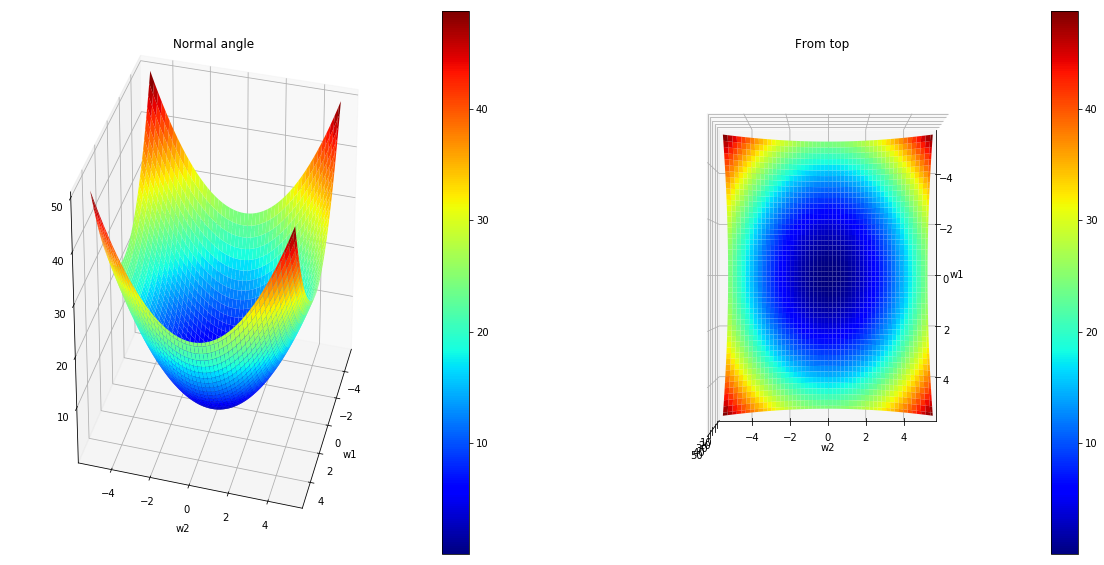

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

def Ridge_penalty_term(w1, w2):
    return w1**2 + w2**2

w1 = np.linspace(-5,5,100)
w2 = np.linspace(-5,5,100)
W1, W2 = np.meshgrid(w1,w2)
Z = np.vectorize(Ridge_penalty_term)(W1,W2)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax1.set_title('Normal angle')
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')
ax1.view_init(30,15)
fig.show()

ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax2.set_title('From top')
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax2.view_init(90, 0)
fig.show()

The two plots are the same plot from different angles. The penalty term of Ridge has a parabola-like shape. 

**cost function of Ridge**

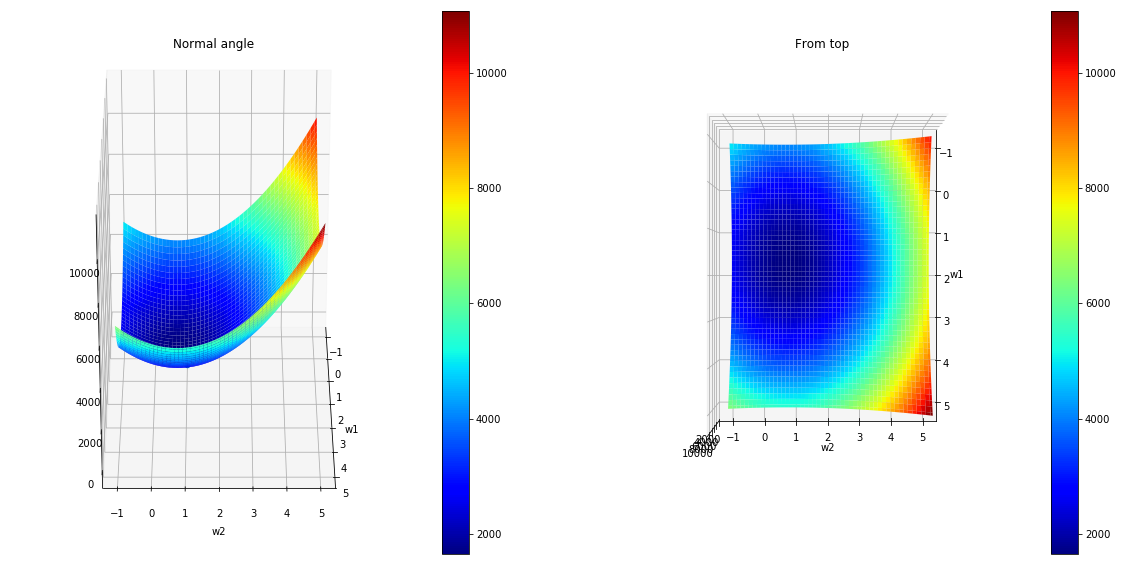

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

lamb = 200
w1 = np.linspace(-1,5,100)
w2 = np.linspace(-1,5,100)
W1, W2 = np.meshgrid(w1,w2)
Z = np.vectorize(Ridge_cost_function)(W1,W2,lamb)

fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax1.set_title('Normal angle')
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')
ax1.view_init(30, 0)
ax1.scatter3D(1,1,10)
fig.show()

ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax2.set_title('From top')
ax2.set_xlabel('w1')
ax2.set_ylabel('w2')
ax2.view_init(90, 0)
fig.show()

The two plots are the same plot from different angles. The cost function is a smooth concave surface.

Let's see how the minimum point of the cost function moves as lambda changes again in Ridge.

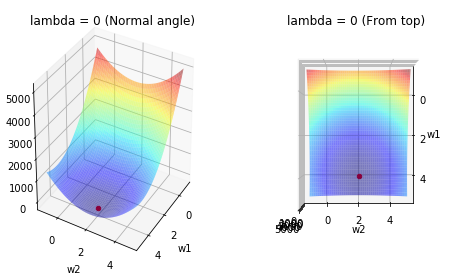

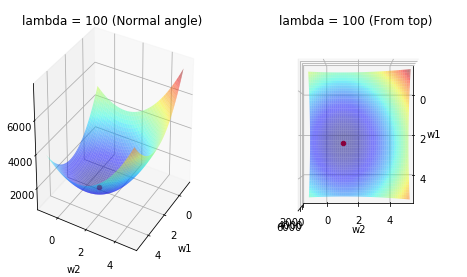

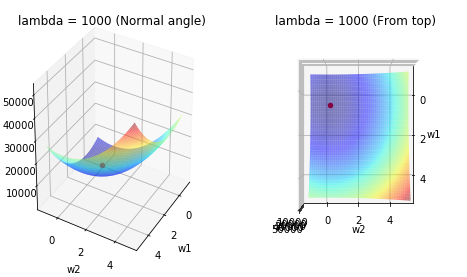

In [12]:
w1 = np.linspace(-1,5,100)
w2 = np.linspace(-1,5,100)
W1, W2 = np.meshgrid(w1,w2)

def Ridge_3D_lambda(lamb, index):
    Z = np.vectorize(Ridge_cost_function)(W1,W2,lamb)
    w1_min, w2_min, z_min = find_min(W1,W2,Z)
    
    fig = plt.figure(figsize=(8,16))

    ax1 = fig.add_subplot(3,2,index, projection='3d')
    ax1.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0, alpha=0.5)
    ax1.scatter3D(w1_min, w2_min, z_min, color='r')
    ax1.set_title(f'lambda = {lamb} (Normal angle)')
    ax1.set_xlabel('w1')
    ax1.set_ylabel('w2')
    ax1.view_init(30, 30)
    fig.show()

    ax2 = fig.add_subplot(3,2,index+1, projection='3d')
    ax2.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0, alpha=0.5)
    ax2.scatter3D(w1_min, w2_min, z_min, color='r')
    ax2.set_title(f'lambda = {lamb} (From top)')
    ax2.set_xlabel('w1')
    ax2.set_ylabel('w2')
    ax2.view_init(90, 0)
    fig.show()
    
for lamb,i in zip([0, 100, 1000], [1,3,5]):
    Ridge_3D_lambda(lamb, i)

The minimum point shown as a red dot is moving from (4, 2) directly to (0,0), not via an axis. An intuitive explanation for this is as follows. The penalty term of Ridge is a parabolic shape. It is symmetrical around z-axis with its center at (0,0) being the lowest point, thus it "pulls" the lowest point of the cost function surface to the origin, not to the axes. This intuitively shows why Ridge doesn't contributes to feature selection .

This is unnecessary but for the further investigation into the models, let's check the path gradient descent takes on the surface of the cost functions.

**gradient descent in Lasso**

The gradient of the cost function of Lasso is as follows.

$ \frac{\partial L}{\partial w_i} = \frac{\partial \Sigma_{j=1}^{m} (\hat{y}^j - y^j)^2 + \lambda \Sigma |w_i|)}{\partial w_i} 
= \frac{\partial \Sigma_{j=1}^{m} (\Sigma_{i=0}^n w_i x_i^j - y^j)^2 + \lambda \Sigma |w_i|)}{\partial w_i} 
= \Sigma_{j=1}^{m} 2x_i^j(\Sigma_{i=0}^n w_i x_i^j - y^j) + \lambda sign(w_i)$

$sign(w_i)$ is 1 when $w_i > 0$, 0 when $w_i = 0$ and -1 when $w_i < 0$.

Gradietn descent is performed by:
1. Take a point $p$ on the paremeter space
2. Calculate the gradient $\nabla G(p)$ at the point
3. Move the point by $- \gamma \nabla G(p)$ ($\gamma$ decides how fast the learning goes)
4. Go back to 2 until $p$ converges

Let's implement it.

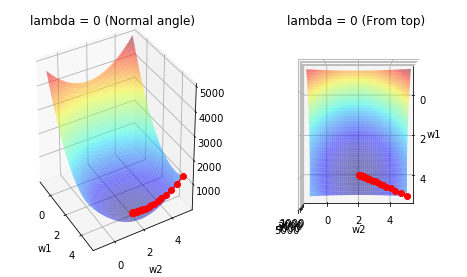

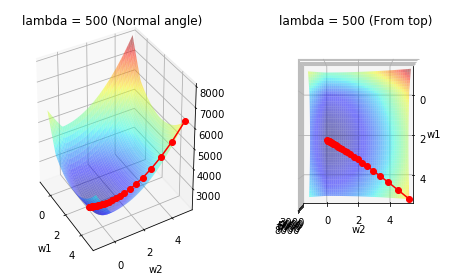

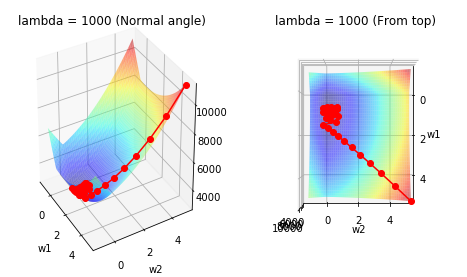

In [28]:
def sign(x):
    if x > 0: return 1
    elif x == 0: return 0
    else: return -1
    
def gradient_Lasso(w1,w2,lamb,gamma):
    w1_next = sum(2 * X[:,0] * (np.dot(X, np.array([w1,w2]).T) - y)) + lamb * sign(w1)
    w1_next = w1 - gamma * w1_next
    w2_next = sum(2 * X[:,1] * (np.dot(X, np.array([w1,w2]).T) - y)) + lamb * sign(w2)
    w2_next = w2 - gamma * w2_next
    return w1_next, w2_next

def gd_path_Lasso(lamb):
    n_iter = 30
    gamma = 5e-4
    w1 = 5
    w2 = 5
    w1s = [w1]
    w2s = [w2]
    for i in range(n_iter):
        w1, w2 = gradient_Lasso(w1,w2,lamb,gamma)
        w1s.append(w1)
        w2s.append(w2)
    return w1s, w2s

w1 = np.linspace(-1,5,100)
w2 = np.linspace(-1,5,100)
W1, W2 = np.meshgrid(w1,w2)

def Lasso_3D_lambda_gd(lamb, index):
    Z = np.vectorize(Lasso_cost_function)(W1,W2,lamb)
    w1gd, w2gd= gd_path_Lasso(lamb)
    zgd = np.vectorize(Lasso_cost_function)(w1gd, w2gd, lamb)
    
    fig = plt.figure(figsize=(8,16))

    ax1 = fig.add_subplot(3,2,index, projection='3d')
    ax1.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0, alpha=0.5)
    ax1.plot(w1gd, w2gd, zgd, 'o-', color='r')
    ax1.set_title(f'lambda = {lamb} (Normal angle)')
    ax1.set_xlabel('w1')
    ax1.set_ylabel('w2')
    ax1.view_init(30, -30)
    fig.show()

    ax2 = fig.add_subplot(3,2,index+1, projection='3d')
    ax2.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0, alpha=0.5)
    ax2.plot(w1gd, w2gd, zgd, 'o-', color='r')
    ax2.set_title(f'lambda = {lamb} (From top)')
    ax2.set_xlabel('w1')
    ax2.set_ylabel('w2')
    ax2.view_init(90, 0)
    fig.show()
    
for lamb,i in zip([0, 500, 1000], [1,3,5]):
    Lasso_3D_lambda_gd(lamb, i)


The red line is the path gradient descent took. For each lambda, (w1, w2) went along the slope smoothly just like a ball rolls down a slope. For lambda = 1000, The path oscillates around w2 = 0. It seems to be due to the V-shaped notch of the penalty term (the gradient is not continuous).

**gradient descent in Ridge**

The gradient of the cost function of Ridge is as follows.

$ \frac{\partial L}{\partial w_i} = \frac{\partial \Sigma_{j=1}^{m} (\hat{y}^j - y^j)^2 + \lambda \Sigma (w_i)^2)}{\partial w_i} 
= \frac{\partial \Sigma_{j=1}^{m} (\Sigma_{i=0}^n w_i x_i^j - y^j)^2 + \lambda \Sigma (w_i)^2)}{\partial w_i} 
= \Sigma_{j=1}^{m} 2x_i^j(\Sigma_{i=0}^n w_i x_i^j - y^j) + 2 \lambda w_i$

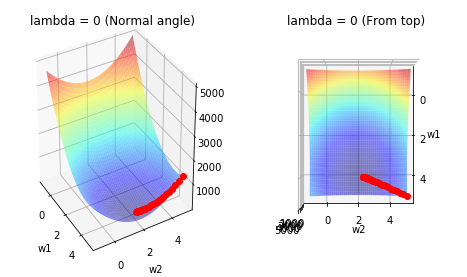

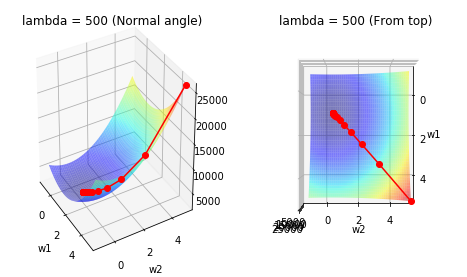

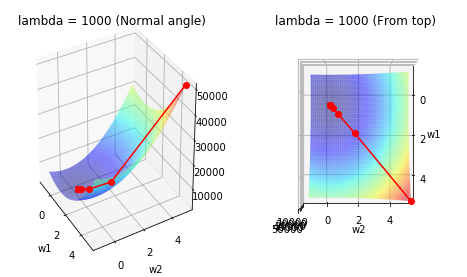

In [31]:
def gradient_Ridge(w1,w2,lamb,gamma):
    w1_next = sum(2 * X[:,0] * (np.dot(X, np.array([w1,w2]).T) - y)) + lamb * 2 * w1
    w1_next = w1 - gamma * w1_next
    w2_next = sum(2 * X[:,1] * (np.dot(X, np.array([w1,w2]).T) - y)) + lamb * 2 * w2
    w2_next = w2 - gamma * w2_next
    return w1_next, w2_next

def gd_path_Ridge(lamb):
    n_iter = 30
    gamma = 3e-4
    w1 = 5
    w2 = 5
    w1s = [w1]
    w2s = [w2]
    for i in range(n_iter):
        w1, w2 = gradient_Ridge(w1,w2,lamb,gamma)
        w1s.append(w1)
        w2s.append(w2)
    return w1s, w2s

w1 = np.linspace(-1,5,100)
w2 = np.linspace(-1,5,100)
W1, W2 = np.meshgrid(w1,w2)

def Ridge_3D_lambda_gd(lamb, index):
    Z = np.vectorize(Ridge_cost_function)(W1,W2,lamb)
    w1gd, w2gd= gd_path_Ridge(lamb)
    zgd = np.vectorize(Ridge_cost_function)(w1gd, w2gd, lamb)
    
    fig = plt.figure(figsize=(8,16))

    ax1 = fig.add_subplot(3,2,index, projection='3d')
    ax1.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0, alpha=0.5)
    ax1.plot(w1gd, w2gd, zgd, 'o-', color='r')
    ax1.set_title(f'lambda = {lamb} (Normal angle)')
    ax1.set_xlabel('w1')
    ax1.set_ylabel('w2')
    ax1.view_init(30, -30)
    fig.show()

    ax2 = fig.add_subplot(3,2,index+1, projection='3d')
    ax2.plot_surface(W1, W2, Z, cmap=cm.jet, linewidth=0, alpha=0.5)
    ax2.plot(w1gd, w2gd, zgd, 'o-', color='r')
    ax2.set_title(f'lambda = {lamb} (From top)')
    ax2.set_xlabel('w1')
    ax2.set_ylabel('w2')
    ax2.view_init(90, 0)
    fig.show()
    
for lamb,i in zip([0, 500, 1000], [1,3,5]):
    Ridge_3D_lambda_gd(lamb, i)


Unlike Lasso, the path of gradient descent in Ridge doesn't oscillate for high lambda perhaps due to continuous gradient.

# Conclusion

The reason why only Lasso contributes to feature selection was intuitively and visually shown.